In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\KIIT\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\KIIT\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\KIIT\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Step-1 and 2: Model Creation and reading .csv file

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import pandas as pd
import warnings
warnings.simplefilter('ignore')

df = pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
df_temp = df.head(80000)
df_temp

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
79995,79996,B000GPW55M,A2F46PVNG406K2,Cindy H.,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,79997,B000JFKU9W,A1O3VKMF2XHAIY,"C. Gomez ""Just a guy""",4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,79998,B000JFKU9W,A142KFKSKQSQ4F,Keith M. Cezat,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,79999,B000JFKU9W,A2NA2KHK2EP4J0,C. Hill,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [6]:
#Step-3: Cleaning data
df_temp = df_temp.drop(['Id'], axis = 1)
df_temp

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
79995,B000GPW55M,A2F46PVNG406K2,Cindy H.,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,B000JFKU9W,A1O3VKMF2XHAIY,"C. Gomez ""Just a guy""",4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,B000JFKU9W,A142KFKSKQSQ4F,Keith M. Cezat,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,B000JFKU9W,A2NA2KHK2EP4J0,C. Hill,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [7]:
df_temp = df_temp.drop(['ProductId'], axis = 1)
df_temp

,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...
79995,A2F46PVNG406K2,Cindy H.,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,A1O3VKMF2XHAIY,"C. Gomez ""Just a guy""",4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,A142KFKSKQSQ4F,Keith M. Cezat,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,A2NA2KHK2EP4J0,C. Hill,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [8]:
df_temp = df_temp.drop(['UserId'], axis = 1)
df_temp

,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...
79995,Cindy H.,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,"C. Gomez ""Just a guy""",4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,Keith M. Cezat,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,C. Hill,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [9]:
df_temp = df_temp.drop(['ProfileName'], axis = 1)
df_temp

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...
79995,0,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,4,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,3,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,2,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [10]:
df_temp = df_temp.drop(['HelpfulnessNumerator'], axis = 1)
df_temp

,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
79995,0,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,4,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,3,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,2,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [11]:
df_temp = df_temp.drop(['HelpfulnessDenominator'], axis = 1)
df_temp

,Score,Time,Summary,Text
0,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...
79995,4,1178409600,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,4,1259625600,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,4,1276992000,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,5,1273708800,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [12]:
df_temp = df_temp.drop(['Time'], axis = 1)
df_temp

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...
79995,4,Yummy mints!,My favorite lifesaver! I like buying them in t...
79996,4,Pumpkin Seed: The Better,So after almost dying of dehydration from the ...
79997,4,Very tasty snack,"Very good taste, good crunch, not too salty, s..."
79998,5,Awesome,"Awesome taste, perfect crunch; these are the b..."


In [13]:
df_temp = df_temp.drop(['Summary'], axis = 1)
df_temp

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...
...,...,...
79995,4,My favorite lifesaver! I like buying them in t...
79996,4,So after almost dying of dehydration from the ...
79997,4,"Very good taste, good crunch, not too salty, s..."
79998,5,"Awesome taste, perfect crunch; these are the b..."


In [14]:
df_temp['Sentiment'] = 0
df_temp

,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,0
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,0
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,0
...,...,...,...
79995,4,My favorite lifesaver! I like buying them in t...,0
79996,4,So after almost dying of dehydration from the ...,0
79997,4,"Very good taste, good crunch, not too salty, s...",0
79998,5,"Awesome taste, perfect crunch; these are the b...",0


In [15]:
df_temp.dtypes

Score         int64
Text         object
Sentiment     int64
dtype: object

In [16]:
for i in range(80000):
    if df_temp['Score'][i] >= 3:
        df_temp['Sentiment'][i] = 1
    else:
        df_temp['Sentiment'][i] = 0

In [17]:
df_temp

,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,1
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,1
...,...,...,...
79995,4,My favorite lifesaver! I like buying them in t...,1
79996,4,So after almost dying of dehydration from the ...,1
79997,4,"Very good taste, good crunch, not too salty, s...",1
79998,5,"Awesome taste, perfect crunch; these are the b...",1


In [18]:
df_temp.isnull()

,Score,Text,Sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
79995,False,False,False
79996,False,False,False
79997,False,False,False
79998,False,False,False


In [19]:
df_temp.dropna(inplace=True)
df_temp

,Score,Text,Sentiment
0,5,I have bought several of the Vitality canned d...,1
1,1,Product arrived labeled as Jumbo Salted Peanut...,0
2,4,This is a confection that has been around a fe...,1
3,2,If you are looking for the secret ingredient i...,0
4,5,Great taffy at a great price. There was a wid...,1
...,...,...,...
79995,4,My favorite lifesaver! I like buying them in t...,1
79996,4,So after almost dying of dehydration from the ...,1
79997,4,"Very good taste, good crunch, not too salty, s...",1
79998,5,"Awesome taste, perfect crunch; these are the b...",1


Text(0.5, 0, 'Scores')

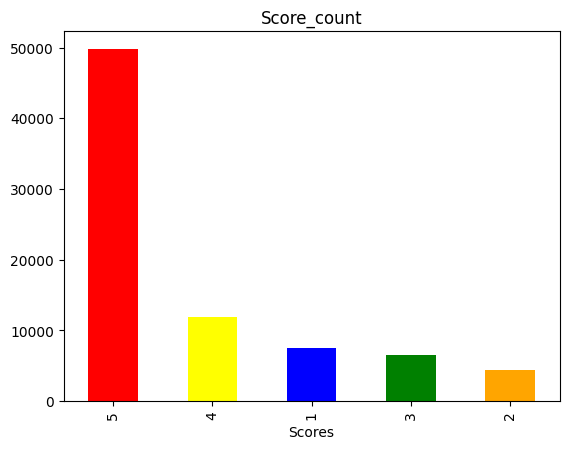

In [20]:
colors = ['red','yellow','blue','green','orange']
df_temp.Score.value_counts().plot(kind="bar", title='Score_count',color = colors).set_xlabel('Scores')

Text(0.5, 0, 'Sentiments')

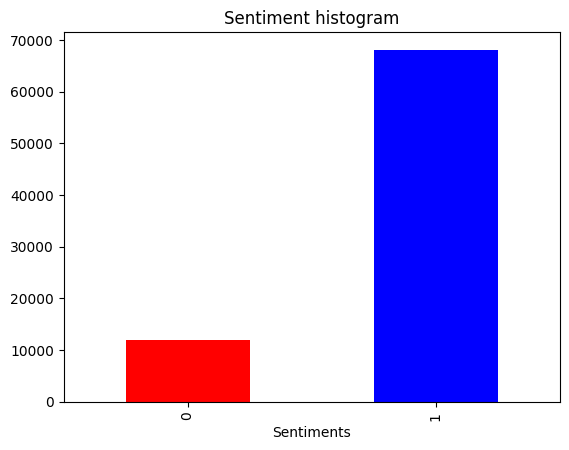

In [21]:
colors = ['red','blue']
df_temp['Sentiment'].value_counts().sort_index().plot(kind='bar', title='Sentiment histogram', color = colors).set_xlabel('Sentiments')

In [22]:
df_temp['Sentiment'].value_counts()

Sentiment
1    68090
0    11910
Name: count, dtype: int64

In [23]:
df_temp = df_temp.drop(['Score'], axis = 1)
df_temp

,Text,Sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1
...,...,...
79995,My favorite lifesaver! I like buying them in t...,1
79996,So after almost dying of dehydration from the ...,1
79997,"Very good taste, good crunch, not too salty, s...",1
79998,"Awesome taste, perfect crunch; these are the b...",1


In [24]:
df_temp['Text'] = df_temp['Text'].str.lower()
df_temp

,Text,Sentiment
0,i have bought several of the vitality canned d...,1
1,product arrived labeled as jumbo salted peanut...,0
2,this is a confection that has been around a fe...,1
3,if you are looking for the secret ingredient i...,0
4,great taffy at a great price. there was a wid...,1
...,...,...
79995,my favorite lifesaver! i like buying them in t...,1
79996,so after almost dying of dehydration from the ...,1
79997,"very good taste, good crunch, not too salty, s...",1
79998,"awesome taste, perfect crunch; these are the b...",1


In [25]:
stp_words=stopwords.words('english')

en_stopwords=set(stopwords.words('english'))


def clean_review(review):
  cleanreview=" ".join(word for word in review.split() if word not in stp_words)
  return cleanreview
 
df_temp['Text']=df_temp['Text'].apply(clean_review)
df_temp

,Text,Sentiment
0,bought several vitality canned dog food produc...,1
1,product arrived labeled jumbo salted peanuts.....,0
2,"confection around centuries. light, pillowy ci...",1
3,looking secret ingredient robitussin believe f...,0
4,great taffy great price. wide assortment yummy...,1
...,...,...
79995,favorite lifesaver! like buying large bag life...,1
79996,almost dying dehydration grocery store sold pu...,1
79997,"good taste, good crunch, salty, shells fairly ...",1
79998,"awesome taste, perfect crunch; best seeds i've...",1


In [26]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

df_temp['Text'] = df_temp['Text'].apply(lemmatize_words)
df_temp

,Text,Sentiment
0,buy several vitality can dog food products fin...,1
1,product arrive label jumbo salt peanuts...the ...,0
2,"confection around centuries. light, pillowy ci...",1
3,look secret ingredient robitussin believe find...,0
4,great taffy great price. wide assortment yummy...,1
...,...,...
79995,favorite lifesaver! like buy large bag lifesav...,1
79996,almost die dehydration grocery store sell pump...,1
79997,"good taste, good crunch, salty, shell fairly t...",1
79998,"awesome taste, perfect crunch; best seed i've ...",1


In [27]:
import string
def removePunc(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
df_temp['Text'] = df_temp['Text'].apply(removePunc)
df_temp

,Text,Sentiment
0,buy several vitality can dog food products fin...,1
1,product arrive label jumbo salt peanutsthe pea...,0
2,confection around centuries light pillowy citr...,1
3,look secret ingredient robitussin believe find...,0
4,great taffy great price wide assortment yummy ...,1
...,...,...
79995,favorite lifesaver like buy large bag lifesave...,1
79996,almost die dehydration grocery store sell pump...,1
79997,good taste good crunch salty shell fairly thin...,1
79998,awesome taste perfect crunch best seed ive eve...,1


In [28]:
df_neg = df_temp[df_temp['Sentiment'] == 0]
df_neg        

,Text,Sentiment
1,product arrive label jumbo salt peanutsthe pea...,0
3,look secret ingredient robitussin believe find...,0
12,cat happily eat felidae platinum two years get...,0
16,love eat good watch tv look movies sweet like ...,0
26,candy red flavor plan chewy would never buy,0
...,...,...
79919,drink disaster taste it bb pina colada mix bad...,0
79920,high hop product like splenda normally drink ...,0
79921,margarita mix excellent ive also cranberry mar...,0
79963,product like expected tooks long time cook nor...,0


In [29]:
df_pos = df_temp[df_temp['Sentiment'] == 1]
df_pos

,Text,Sentiment
0,buy several vitality can dog food products fin...,1
2,confection around centuries light pillowy citr...,1
4,great taffy great price wide assortment yummy ...,1
5,get wild hair taffy order five pound bag taffy...,1
6,saltwater taffy great flavor soft chewy candy ...,1
...,...,...
79995,favorite lifesaver like buy large bag lifesave...,1
79996,almost die dehydration grocery store sell pump...,1
79997,good taste good crunch salty shell fairly thin...,1
79998,awesome taste perfect crunch best seed ive eve...,1


In [30]:
df_positive = df_pos.sample(n=25000)
df_negative = df_neg.sample(n=5000)
df_merged = pd.concat([df_positive, df_negative])
df_merged = df_merged.sample(frac=1)
df_merged

,Text,Sentiment
76186,love dressing problem find lot light dress tas...,1
22299,chocoholic enjoy 3 musketeers candy bar also h...,1
37195,realize taste tea particularly green tea matte...,0
9906,health reasons try eat highly nutritious low c...,1
29807,regime eat better work out cut soda high sugar...,1
...,...,...
65141,receive fresh soft time licorice lovers love p...,1
41341,love colmans mustard get great product great p...,1
2827,really like coconut water surprise per 17oz bo...,1
19871,single cup brewers seem wave home coffee make ...,1


In [31]:
df_pos2 = df_pos.sample(n=25000)
df_neg2 = df_neg.sample(n=5000)
df_merged2 = pd.concat([df_pos2,df_neg2])
df_merged2 = df_merged2.sample(frac=1)
df_merged2

,Text,Sentiment
14133,think good treat midsize dogs high quality org...,1
29454,war pro stuff fantastic salty buttery taste li...,1
65938,dog think chicken zukes minis really tasty pro...,1
18997,twin develop tea last year 2006 300th annivers...,1
59892,happy find wonderful decaf tea guests tea nice...,1
...,...,...
8856,best gluten free cookies around snicker doodle...,1
46298,idea even though buy nonhydrogenated natural p...,1
4490,purchase tea someone enjoy trader joes white p...,1
74094,wonderful product one din taco bell use eat yo...,1


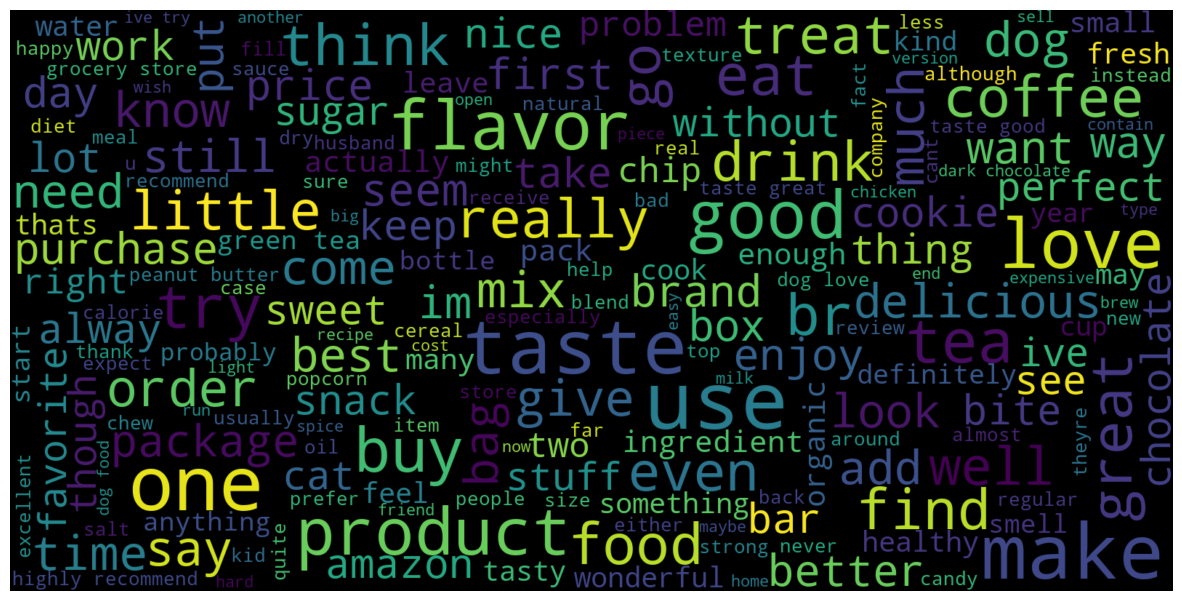

In [32]:
consolidated=' '.join(word for word in df_merged['Text'][df_merged['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

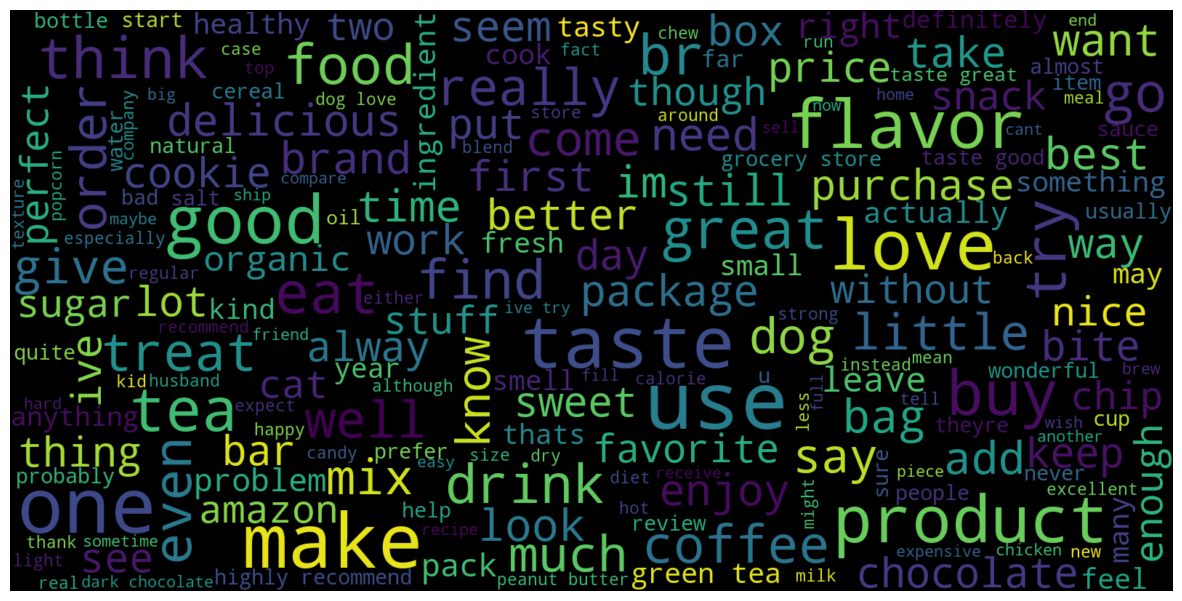

In [33]:
consolidated=' '.join(word for word in df_merged2['Text'][df_merged2['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
pip install Scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\KIIT\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,f1_score

In [36]:
cv=TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore') 
X1 = cv.fit_transform(df_merged['Text'] ).toarray()
X2 = cv.fit_transform(df_merged2['Text'] ).toarray()

In [37]:
x1_train ,x1_test,y1_train,y1_test=train_test_split(X1,df_merged['Sentiment'], test_size=0.20)

In [38]:
x2_train ,x2_test,y2_train,y2_test=train_test_split(X2,df_merged2['Sentiment'], test_size=0.25)

In [39]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs', max_iter=400)
 
model.fit(x1_train,y1_train)

pred1=model.predict(x1_test)

print('Accuracy score: ',accuracy_score(y1_test,pred1))
print('F1 score: ',f1_score(y1_test,pred1))

Accuracy score:  0.888
F1 score:  0.936024371667936


In [41]:
model.predict(x1_test[0].reshape(1,-1))


array([0], dtype=int64)

In [42]:
model.predict_proba(x1_test[0].reshape(1,-1))


array([[0.8919291, 0.1080709]])

In [43]:
model.fit(x2_train,y2_train)
 
#testing the model
pred2=model.predict(x2_test)
 
#model accuracy
print(accuracy_score(y2_test,pred2))
print('Accuracy on training data',str(model.score(x2_train,y2_train)))
print('Accuracy on testing data',str(model.score(x2_test,y2_test)))
print('F1 score: ',f1_score(y2_test,pred2))

0.8886666666666667
Accuracy on training data 0.9148
Accuracy on testing data 0.8886666666666667
F1 score:  0.9366800636990977


In [44]:
import joblib
joblib.dump(model,'model-logistic-regression.pkl')


['model-logistic-regression.pkl']

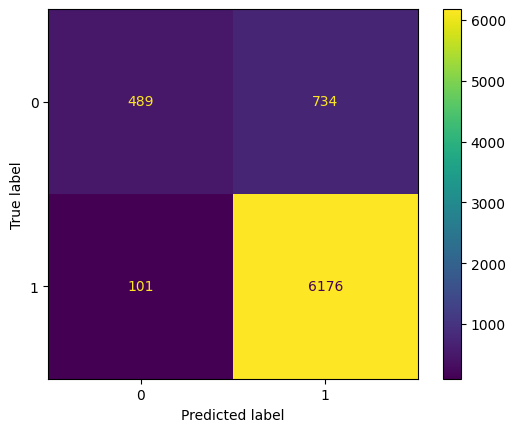

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2_test,pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1])
cm_display.plot()
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators = 70)
model4.fit(x1_train,y1_train)
pred7 = model4.predict(x1_test)
print('Accuracy Score: ',accuracy_score(y1_test,pred7))
print('F1 Score: ',f1_score(y1_test,pred7))

Accuracy Score:  0.8631666666666666
F1 Score:  0.9239462714219545


In [48]:
model4.predict_proba(x1_test[0].reshape(1,-1))


array([[0.52857143, 0.47142857]])

In [49]:
model4.fit(x2_train,y2_train)
pred8 = model4.predict(x2_test)
print('Accuracy Score: ',accuracy_score(y2_test,pred8))
print('F1 Score: ',f1_score(y2_test,pred8))

Accuracy Score:  0.8632
F1 Score:  0.924235711120957


In [53]:
model4.predict(x2_test[0].reshape(1,-1))


array([1], dtype=int64)

In [56]:
model4.predict_proba(x2_test[0].reshape(1,-1))


array([[0.1, 0.9]])

In [57]:
import joblib
joblib.dump(model4,'model-random-forest.pkl')


['model-random-forest.pkl']

In [58]:
df_merged = df_merged.sample(n=10000)
df_merged2 = df_merged2.sample(n=10000)

In [59]:
cv=TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore') 
vectorizer =  cv
X3 = cv.fit_transform(df_merged['Text'] ).toarray()
X4 = cv.fit_transform(df_merged2['Text'] ).toarray()

In [60]:
x3_train ,x3_test,y3_train,y3_test=train_test_split(X3,df_merged['Sentiment'], test_size=0.20)

MemoryError: Unable to allocate 1.47 GiB for an array with shape (8000, 24723) and data type float64

: 

In [ ]:
x4_train ,x4_test,y4_train,y4_test=train_test_split(X4,df_merged['Sentiment'], test_size=0.20)

In [ ]:
from xgboost import XGBClassifier
model2 = XGBClassifier(random_state=42,learning_rate=0.9)
model2.fit(x3_train,y3_train)
pred3 = model2.predict(x3_test)
print('Accuracy Score: ',accuracy_score(y3_test,pred3))
print('F1 Score: ',f1_score(y3_test,pred3))

Accuracy Score:  0.856
F1 Score:  0.915936952714536


In [ ]:

model2.fit(x4_train,y4_train)
pred4 = model2.predict(x4_test)
print('Accuracy Score: ',accuracy_score(y4_test,pred4))
print('F1 Score: ',f1_score(y4_test,pred4))

Accuracy Score:  0.7845
F1 Score:  0.8778690847265513


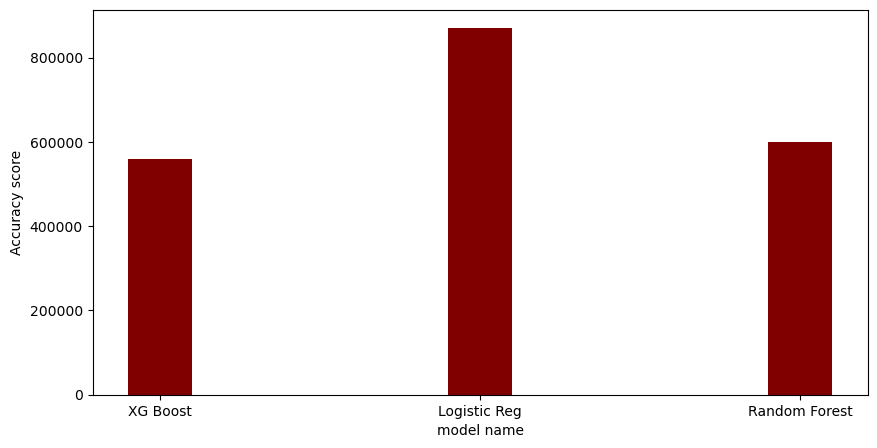

In [ ]:
#Comparing the accuracy score of the three models

import matplotlib.pyplot as plt
accur = [8560000,8870000,8600000]
for i in range(3):
    accur[i] = accur[i] - 8000000
    
name = ['XG Boost','Logistic Reg','Random Forest']
fig = plt.figure(figsize = (10, 5))
plt.bar(name, accur, color ='maroon', width = 0.2)
 
plt.xlabel("model name")
plt.ylabel("Accuracy score")
plt.show()
